Model performance:
           model_name        MAE          MSE
2    ridge_regressor  14.370150   315.663053
3  xgboost_regressor  14.719606   341.308960
0     mean_regressor  17.831383   474.247668
1   random_regressor  29.622632  1315.661440


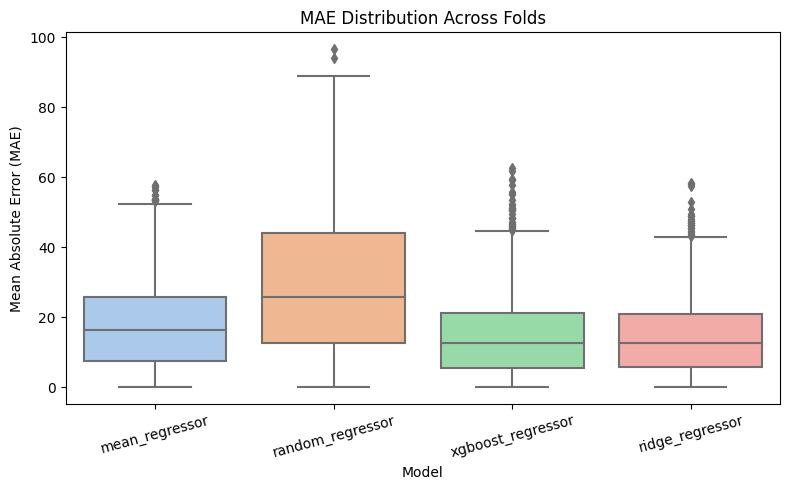

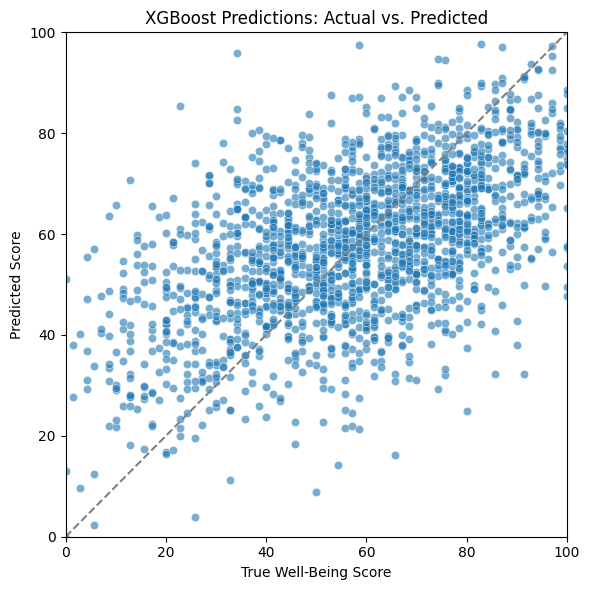

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load predictions
df = pd.read_csv("predictions.csv")

# Calculate MAE and MSE by model
metrics_df = df.groupby("model_name").apply(
    lambda group: pd.Series({
        "MAE": np.mean(np.abs(group["y_test"] - group["y_predict"])),
        "MSE": np.mean((group["y_test"] - group["y_predict"])**2)
    })
).reset_index()

print("Model performance:\n", metrics_df.sort_values("MAE"))

# --- Boxplot of MAE across folds ---
mae_by_fold = df.copy()
mae_by_fold["abs_error"] = np.abs(mae_by_fold["y_test"] - mae_by_fold["y_predict"])

plt.figure(figsize=(8, 5))
sns.boxplot(x="model_name", y="abs_error", data=mae_by_fold, palette="pastel")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Model")
plt.title("MAE Distribution Across Folds")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("mae_boxplot.png")
plt.show()

# --- Scatter plot for XGBoost predictions ---
xgb_df = df[df["model_name"] == "xgboost_regressor"]

plt.figure(figsize=(6, 6))
sns.scatterplot(x="y_test", y="y_predict", data=xgb_df, alpha=0.6)
plt.plot([0, 100], [0, 100], '--', color='gray')  # y = x reference line
plt.xlabel("True Well-Being Score")
plt.ylabel("Predicted Score")
plt.title("XGBoost Predictions: Actual vs. Predicted")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("xgboost_scatter.png")
plt.show()


In [2]:
import matplotlib
print(matplotlib.__version__)

3.9.4
